In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 

Consider object A at point (0,0), moving at speed v at all times pointed towards object B. Object B start at point (dx,0) and moves at velocity (0,u). Given that v > u, what is the time until collision, T?

In [2]:
# parameters
dx = 15. 
v = 1.

# Golden ratio for special case of total vertical displacement = horizontal displacement
phi = 0.5*(5**0.5 + 1.)

# Defining u to be some fraction of v.
ratio = phi
u = v/ratio

# Time steps
dt = 0.0001

Here we simulate the setup using a simple first order method. x1 += v_x * dt; y1 += v_y * dt.  

In [3]:
# Simulation
x1 = []
y1 = []
x2 = []
y2 = []
time = []

itime = 0
time.append(0.)
x1.append(0.)
y1.append(0.)
x2.append(dx)
y2.append(0.)

In [4]:
def get_sep(r1,r2,itime):
    return np.linalg.norm(np.array([r1[0][itime],r1[1][itime]]) - np.array([r2[0][itime],r2[1][itime]]))

def get_vel(r1,r2,itime,v1):
    sep = get_sep(r1,r2,itime)
    return np.array([v1*(r2[0][itime]-r1[0][itime])/sep,v1*(r2[1][itime]-r1[1][itime])/sep])

In [5]:
while get_sep([x1,y1],[x2,y2],itime) > 0. :
    vel = get_vel([x1,y1],[x2,y2],itime,v)
    dt_use = dt
    
    if vel[0] > 0.:
        if (x2[itime] - x1[itime])/vel[0] < dt_use:
            dt_use = (x2[itime] - x1[itime])/vel[0]
        
    if vel[1] > u:
        if (y2[itime] - y1[itime])/(vel[1] - u) < dt_use:
            dt_use = (y2[itime] - y1[itime])/(vel[1] - u)
        
    time.append(time[itime] + dt_use)
    x1.append( x1[itime] + vel[0]*dt_use )
    y1.append( y1[itime] + vel[1]*dt_use )
    x2.append(dx)
    y2.append( y2[itime] + u*dt_use )    
    itime = itime + 1
    
   

In [6]:
# Final time to collid, and y position.
print itime, time[itime], y1[itime]

242706 24.270559831426556 15.000030901854576


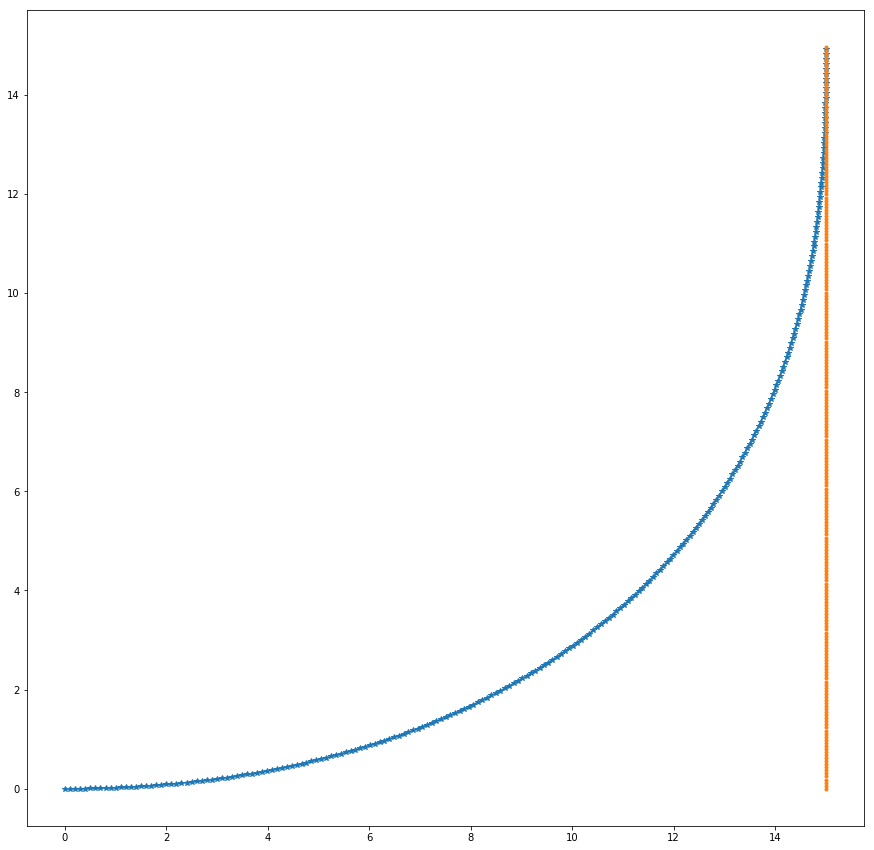

In [7]:
plt.figure(figsize=(15,15))
plt.plot(x1[::1000],y1[::1000],'-*')
plt.plot(x2[::1000],y2[::1000], '.')
plt.show()

In [8]:
print time[itime], dx*v/(v**2 - u**2)

24.270559831426556 24.2705098312
